# Working with test data

In [2]:
!pip install -q datasets

# import Hugging Face Dataset
from datasets import load_dataset

# load the dataset with text classification labels
dataset = load_dataset('imdb')

Found cached dataset imdb (/home/codespace/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
# show the first example
dataset['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

<Axes: ylabel='Count'>

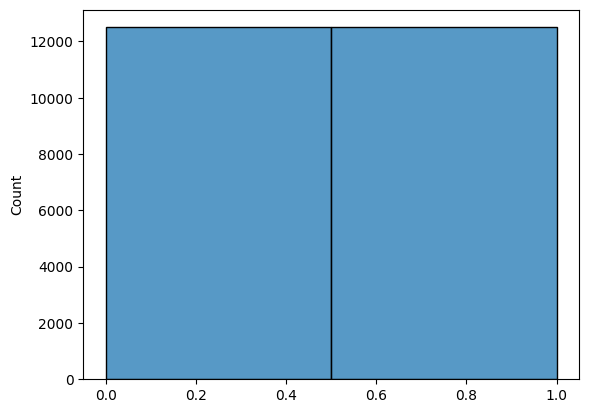

In [4]:
import seaborn as sns

# plot the distribution of the labels
sns.histplot(dataset['train']['label'], bins=2)

In [5]:
# now, let us import the code to text summarization dataset
dsCode = load_dataset('code_x_glue_ct_code_to_text', 'java', split='test')

# and see the first example of the code
dsCode[0]

Found cached dataset code_x_glue_ct_code_to_text (/home/codespace/.cache/huggingface/datasets/code_x_glue_ct_code_to_text/java/0.0.0/f8b7e9d51f609a87e7ec7c7431706d4ee0b402e3398560410313d4acc67060a0)


{'id': 0,
 'repo': 'ReactiveX/RxJava',
 'path': 'src/main/java/io/reactivex/internal/observers/QueueDrainObserver.java',
 'func_name': 'QueueDrainObserver.fastPathOrderedEmit',
 'original_string': 'protected final void fastPathOrderedEmit(U value, boolean delayError, Disposable disposable) {\n        final Observer<? super V> observer = downstream;\n        final SimplePlainQueue<U> q = queue;\n\n        if (wip.get() == 0 && wip.compareAndSet(0, 1)) {\n            if (q.isEmpty()) {\n                accept(observer, value);\n                if (leave(-1) == 0) {\n                    return;\n                }\n            } else {\n                q.offer(value);\n            }\n        } else {\n            q.offer(value);\n            if (!enter()) {\n                return;\n            }\n        }\n        QueueDrainHelper.drainLoop(q, observer, delayError, disposable, this);\n    }',
 'language': 'java',
 'code': 'protected final void fastPathOrderedEmit(U value, boolean delayEr

In [6]:
# we can even check how many tokens are in the code
len(dsCode['code_tokens'])

10955

In [13]:
import pandas as pd

# create a list of tokens
lstCodeLines = dsCode['code_tokens']

# flatten the list of lists to one list
lstCodeLines = [item for sublist in lstCodeLines for item in sublist]

#print the first elements of the list
print(lstCodeLines[:10])

dfCode = pd.DataFrame(lstCodeLines, columns=['token'])

['protected', 'final', 'void', 'fastPathOrderedEmit', '(', 'U', 'value', ',', 'boolean', 'delayError']


[Text(0, 0, ')'),
 Text(1, 0, '('),
 Text(2, 0, '.'),
 Text(3, 0, ';'),
 Text(4, 0, '{'),
 Text(5, 0, '}'),
 Text(6, 0, ','),
 Text(7, 0, '='),
 Text(8, 0, 'if'),
 Text(9, 0, 'return'),
 Text(10, 0, 'String'),
 Text(11, 0, 'null'),
 Text(12, 0, 'new'),
 Text(13, 0, '<'),
 Text(14, 0, '>'),
 Text(15, 0, 'final'),
 Text(16, 0, 'public'),
 Text(17, 0, '+'),
 Text(18, 0, 'int'),
 Text(19, 0, '==')]

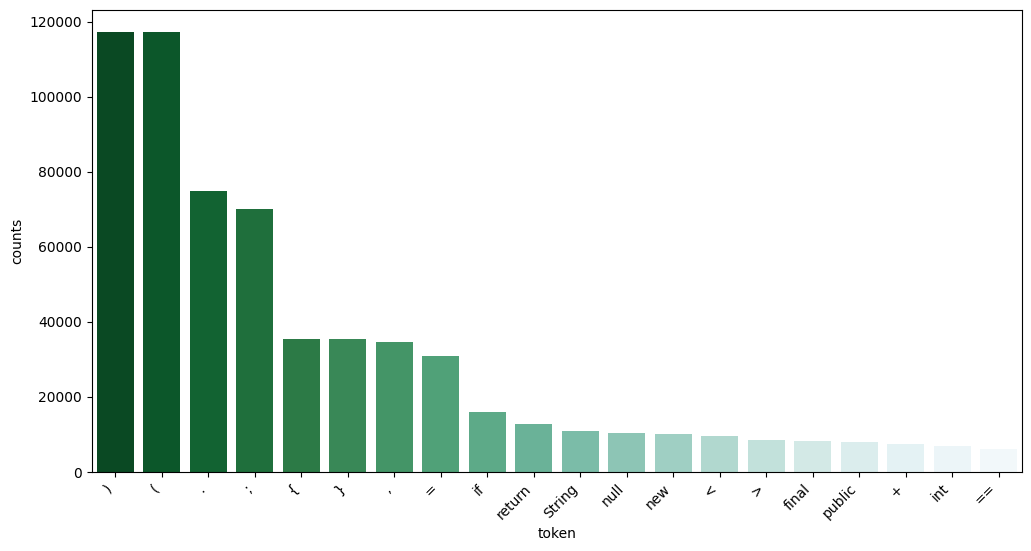

In [30]:
import matplotlib.pyplot as plt

# group the tokens and count the number of occurences
# which will help us to visualize the frequency of tokens in the next step
dfCodeCounts = dfCode.groupby('token').size().reset_index(name='counts')

# sort the counts by descending order
dfCodeCounts = dfCodeCounts.sort_values(by='counts', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

# plot the frequency of tokens as a barplot
# for the simplicity, we only take the first 20 tokens
sns.barplot(x='token', 
            y='counts', 
            data=dfCodeCounts[:20], 
            palette=sns.color_palette("BuGn_r", n_colors=20), 
            ax=ax)

# rotate the x-axis labels to make sure that
# we see the full token names, i.e. lines of code
ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=45, 
                   horizontalalignment='right')
